In [22]:
import pandas as pd
df = pd.read_csv('/content/Boston.csv')


In [39]:
print(df.head())
print("----------"*10)
print(df.tail())
print("----------"*10)
print(df.info())
print("----------"*10)
print(df.isnull().sum())
print("----------"*10)
df.describe()


   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
----------------------------------------------------------------------------------------------------
     Unnamed: 0     crim   zn  indus  chas    nox     rm   age     dis  rad  \
501         502  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527  0.0  11.93  

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Linear** **Regression**

>trainig the first model as linear regression



In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [9]:
X = df.drop('medv',axis =1)
y = df['medv']

In [10]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test_scaled)

In [96]:
r2_lr = r2_score(y_test, y_pred)
print(r2_lr)

0.8320841268858754


In [85]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

bins = [0, 15, 30, 100]  # 3 categories
labels = ["Low", "Medium", "High"]

y_test_cat = np.digitize(y_test, bins)
y_pred_cat = np.digitize(y_pred, bins)

cm = confusion_matrix(y_test_cat, y_pred_cat)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n")
print(classification_report(y_test_cat, y_pred_cat, target_names=labels))
acc_lr = accuracy_score(y_test_cat, y_pred_cat)

Confusion Matrix:
 [[13  6  0]
 [ 4 66  2]
 [ 0  2  9]]

Classification Report:

              precision    recall  f1-score   support

         Low       0.76      0.68      0.72        19
      Medium       0.89      0.92      0.90        72
        High       0.82      0.82      0.82        11

    accuracy                           0.86       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.86      0.86      0.86       102



**Random** **Forest**

> second model is used as random forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(r2_rf)

0.8749883619088371


In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
bins = [0, 15, 30, 100]
labels = ["Low", "Medium", "High"]
y_test_cat = np.digitize(y_test, bins)
y_pred_cat = np.digitize(y_pred_rf, bins)
confusion_matrix(y_test_cat, y_pred_cat)

cm1 = confusion_matrix(y_test_cat, y_pred_cat)
print("Confusion Matrix:\n", cm1)
print("\nClassification Report:\n")
print(classification_report(y_test_cat, y_pred_cat, target_names=labels))
acc_rf = accuracy_score(y_test_cat, y_pred_cat)

Confusion Matrix:
 [[14  5  0]
 [ 5 65  2]
 [ 0  2  9]]

Classification Report:

              precision    recall  f1-score   support

         Low       0.74      0.74      0.74        19
      Medium       0.90      0.90      0.90        72
        High       0.82      0.82      0.82        11

    accuracy                           0.86       102
   macro avg       0.82      0.82      0.82       102
weighted avg       0.86      0.86      0.86       102



**SVM**

> 3 model using SVM



In [93]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred_sv = svr.predict(X_test_scaled)

r2_svm = r2_score(y_test, y_pred_sv)

print(r2_svm)

0.8320841268858754


In [94]:
bins = [0, 15, 30, 100]
labels = ["Low", "Medium", "High"]
y_test_cat = np.digitize(y_test, bins)
y_pred_cat = np.digitize(y_pred_sv, bins)

cm3 = confusion_matrix(y_test_cat, y_pred_cat)
print("\nConfusion Matrix:\n", cm3)

print("\nClassification Report:\n")
print(classification_report(y_test_cat, y_pred_cat, target_names=labels))
acc_svm = accuracy_score(y_test_cat, y_pred_cat)


Confusion Matrix:
 [[13  6  0]
 [ 4 66  2]
 [ 0  2  9]]

Classification Report:

              precision    recall  f1-score   support

         Low       0.76      0.68      0.72        19
      Medium       0.89      0.92      0.90        72
        High       0.82      0.82      0.82        11

    accuracy                           0.86       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.86      0.86      0.86       102



**Comparsion**

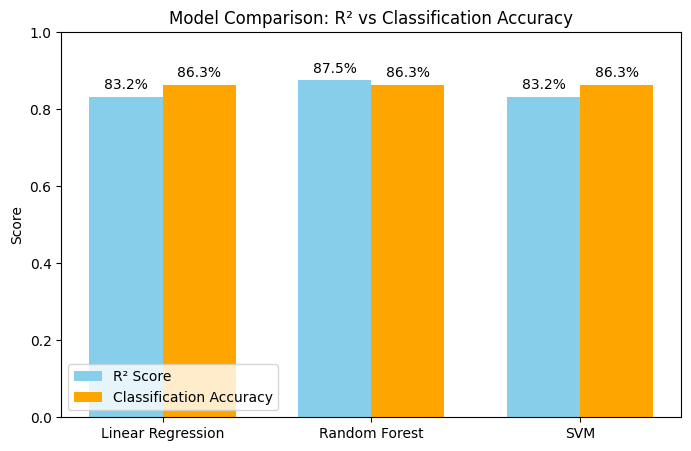

In [95]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Linear Regression", "Random Forest", "SVM"]
r2_scores = [r2_lr, r2_rf, r2_svm]
accuracies = [acc_lr, acc_rf, acc_svm]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, r2_scores, width, label="R² Score", color='skyblue')
bars2 = plt.bar(x + width/2, accuracies, width, label="Classification Accuracy", color='orange')

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height*100:.1f}%", ha='center', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height*100:.1f}%", ha='center', fontsize=10)

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Comparison: R² vs Classification Accuracy")
plt.legend()
plt.ylim(0,1)
plt.show()
